In [1]:
NAME = "Bingbing Ma"

---

# Lab 7: Dimensionality Reduction

**Please read the following instructions very carefully**

## Working on the assignment / FAQs
- **Always use the seed/random_state as *42* wherever applicable** (This is to ensure repeatability in answers, across students and coding environments)
- The type of question and the points they carry are indicated in each question cell
- To avoid any ambiguity, each question also specifies what *value* must be set. Note that these are dummy values and not the answers
- If an autograded question has multiple answers (due to differences in handling NaNs, zeros etc.), all answers will be considered.
- You can delete the `raise NotImplementedError()`
- **Submitting the assignment** : Download the '.ipynb' file and the PDF file from Colab and upload it to Gradescope. Do not delete any outputs from cells before submitting.
- That's about it. Happy coding!


Available software:
 - Python's Gensim module: https://radimrehurek.com/gensim/ (install using pip)
 - Sklearn’s  TSNE module in case you use TSNE to reduce dimension (optional)
 - Python’s Matplotlib (optional)

_Note: The most important hyper parameters of skip-gram/CBOW are vector size and windows size_


In [2]:
!pip install gensim

import pandas as pd
import numpy as np
import gensim
import requests
import string

from IPython.display import Image
from sklearn.manifold import TSNE

# To make the visualizations
!git clone https://github.com/CAHLR/d3-scatterplot.git
from google.colab.output import eval_js
from IPython.display import Javascript
from gensim.models import KeyedVectors

# To download trained model (Google news)
import gensim.downloader as api
google_model = api.load('word2vec-google-news-300')

import nltk
from nltk import word_tokenize, tokenize
nltk.download('punkt')

fatal: destination path 'd3-scatterplot' already exists and is not an empty directory.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### **Q1** (0.25 points)
Download your text corpus. (A good place to start is the [nltk corpus](http://www.nltk.org/nltk_data/) or the [gutenberg project](https://www.gutenberg.org/))

In [3]:
#your code here

url = "https://www.gutenberg.org/cache/epub/10007/pg10007.txt"

In [4]:
#Save the raw text that you just downloaded in this variable
raw = requests.get(url).content.decode('utf8')

In [5]:
#This is an autograded cell, do not edit/delete
print(raw[:1000])

﻿The Project Gutenberg eBook of Carmilla
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Carmilla

Author: Joseph Sheridan Le Fanu

Release date: November 1, 2003 [eBook #10007]
                Most recently updated: September 12, 2024

Language: English

Credits: Suzanne Shell, Sjaani and PG Distributed Proofreaders


*** START OF THE PROJECT GUTENBERG EBOOK CARMILLA ***




Carmilla

by Joseph Sheridan Le Fanu

Copyright 1872


Contents

 PROLOGUE
 CHAPTER I. An Early Fright
 CHAPTER II. A Guest
 CHAPTER III. We Compare Notes
 CHAPTER IV. Her H


### **Q2** (0.25 points)
Tokenize your corpus. Make sure that that the result is a list of lists i.e. The top-level list (outer list) is a list of sentences, and the inner list is a list of words in a given sentence.

Consider the following text:

```
text = "I spent $15.35 on my lunch today. Food in Berkeley is very expensive!"
```

It could be tokenized as follows:

```
tok_corp = [['I', 'spent', '$', '15.35', 'on', 'my', 'lunch', 'today'],
 ['Food', 'in', 'Berkeley', 'is', 'very', 'expensive']]
```


Note: There are many different (and correct) ways of tokenizing. Your answer doesn't need to match exactly with this illustrative example.

In [6]:
#code here

pattern = r'''(?x)
(?:[A-Z]\.)+
|\w+(?:[-']\w+)*
|\$?\d+(?:\.\d+)?
|\.\.\.
|[.,;"'?()-_`]
'''
import nltk
nltk.download('punkt_tab')
tokenized_raw = " ".join(nltk.regexp_tokenize(raw, pattern))
tokenized_raw = tokenize.sent_tokenize(tokenized_raw)
nopunct = []
for sent in tokenized_raw:
    a = [w for w in sent.split() if w not in string.punctuation]
    nopunct.append(" ".join(a))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [7]:
#Save the tokenized sentences as a list of list in this variable
tok_corp = [nltk.word_tokenize(sent) for sent in nopunct]

In [8]:
#This is an autograded cell, do not edit/delete
for sent in tok_corp[:3]:
  print(sent)
  print("\n")

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Carmilla', 'This', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever']


['You', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'www']


['gutenberg']




### **Q3** (0.25 points)
Train gensim using your own dataset. Name the trained model variable as `model`.



In [9]:
#code here
model = gensim.models.Word2Vec(tok_corp, min_count=1, window=5)


In [10]:
#This is an autograded cell, do not edit/delete
print(f'Corpus Size: {model.corpus_total_words}')
print(f'Corpus Count: {model.corpus_count}')
print(f'Training time: {model.total_train_time}')
print(f'Sample words: {list(model.wv.index_to_key[:10])}')

Corpus Size: 31454
Corpus Count: 1596
Training time: 0.38969633899614564
Sample words: ['the', 'and', 'I', 'of', 'a', 'to', 'in', 'was', 'my', 'her']


### **Q4** (0.25 points)



#### **Q4a**

Create a list of the unique set of words from your corpus. Name the list variable as `unique_words`.


In [11]:
#code here
unique_words = list(set([item for sublist in tok_corp for item in sublist]))

In [12]:
#This is an autograded cell, do not edit/delete
print(unique_words[:10])

['tomorrow', 'seven', 'bowed', 'witches', 'lamps', 'Duke', 'NO', 'seems', 'cudgeling', 'Girls']


#### **Q4b**

Extract respective vectors corresponding to the words in your corpus and store the vectors in a variable called `vector_list`.

In [25]:
#code here
vector_list = model.wv[unique_words]

In [26]:
#This is an autograded cell, do not edit/delete
print(f'Array Shape: {np.array(vector_list).shape}')
for i in range(5):
    print(unique_words[i], vector_list[i])

Array Shape: (4777, 100)
tomorrow [-0.01199622  0.02220895  0.01009125  0.01295176  0.00442289 -0.03064626
  0.02833166  0.05459953 -0.0259503  -0.0200932  -0.00584154 -0.04085107
 -0.00936629  0.01060044  0.01104075 -0.00065828  0.01321584 -0.02381387
 -0.0102649  -0.05560856  0.02497594  0.01563438  0.02411989 -0.02075611
 -0.00624132 -0.00117789 -0.03461448 -0.01732716 -0.02618267  0.00727967
  0.03070381  0.00256463  0.01199432 -0.0281102  -0.01745557  0.01135071
  0.01974084 -0.01888659 -0.0023523  -0.03782862  0.01289627 -0.03837657
  0.00570315  0.01257477  0.03125727 -0.01160495 -0.03387763 -0.00991521
  0.00292727  0.01264414  0.01403463 -0.01556758  0.00270225  0.00505503
 -0.01183458  0.01274823  0.02262292 -0.01567509 -0.02679653  0.00524902
  0.00511736  0.01029275  0.00708689  0.0177017  -0.03027662  0.02255684
  0.00972796  0.01558227 -0.034396    0.01477415 -0.02745672  0.00392571
  0.02028783 -0.00486449  0.02230178  0.02014902  0.00361583 -0.0103203
 -0.01169032  0.00

### **Q5** (3 points)
Based on your knowledge and understanding of the text corpus you have chosen, **form 3 hypotheses** of analogies or relationships (between words) that you expect will hold and **give a reason why. Experimentally validate these hypotheses** using similarity of the word vectors.

**Example**: If using Moby Dick as the corpus, one hypothesis might be that the whale, "Moby Dick" is (cosine) more similar to "fate" than to "evil" because Moby Dick is symbolic of the nature and the universe and isn't necessarily 'bad'. Or "Moby Dick" is more similar to "opposition" than to "surrender" because Moby Dick fights for its survival.

Note: Please do NOT use the same example as in the prompt.

Note 2: It's okay if the model disproves your hypotheses.

Hypothesis 1: In this book, Carmilla and Laura are the main characters whereas Dr. Hesselius is not the main character. Therefore, I hypothesize that the relationship between Carmilla and Laura relationship is stronger than their relationships with Dr. Hesselius.

Hypothesis 2: In this book, the theme involves vampire and horror. I hypothesize that vampire in this book is more closely associated with being mysterious rather than humorous.

Hypothesis 3: Though Dr. Hesselius is a physician, he might be more closely aligned with the supernatural, since this book is not purely in scientific reasoning.

In [27]:
#your code here for validating hypotheses 1
cl = model.wv.similarity('Laura', 'Carmilla')
ch=model.wv.similarity('Carmilla', 'Hesselius')
lh = model.wv.similarity('Laura', 'Hesselius')
cl, ch, lh

(0.94504565, 0.94611716, 0.88923526)

In [28]:
#your code here for validating hypotheses 2
vf = model.wv.similarity('vampire', 'fun')
vm = model.wv.similarity('vampire', 'mysterious')
vf, vm

(0.22804026, 0.9958254)

In [29]:
#your code here for validating hypotheses 3
hs = model.wv.similarity('Hesselius', 'science')
hs_2 = model.wv.similarity('Hesselius', 'supernatural')
hs, hs_2

(0.6085308, 0.50898415)

### **Q6** Visualizing the trained vectors (1.5 points)

#### **Q6a**

Run K-means clustering on your word vectors (as you did in Q-6 of Lab-5). Use the word vectors from the model you trained in this lab.

In [30]:
#your code here
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(vector_list)
kmeans.labels_
# centroids = kmeans.cluster_centers_
# most_rep_cluster1 = model.similar_by_vector(centroids[0], topn=5)

array([0, 2, 0, ..., 0, 0, 0], dtype=int32)

#### **Q6b**
Reduce the dimensionality of your word vectors using TSNE

In [31]:
#your code here

from sklearn.manifold import TSNE

# Lets dim reduce the 16 dimension vectors to 2 dimensions to vizualise the dataset
data_embed = TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(np.array(vector_list))


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 4777 samples in 0.001s...
[t-SNE] Computed neighbors for 4777 samples in 0.756s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4777
[t-SNE] Computed conditional probabilities for sample 2000 / 4777
[t-SNE] Computed conditional probabilities for sample 3000 / 4777
[t-SNE] Computed conditional probabilities for sample 4000 / 4777
[t-SNE] Computed conditional probabilities for sample 4777 / 4777
[t-SNE] Mean sigma: 0.018135
[t-SNE] Computed conditional probabilities in 0.467s
[t-SNE] Iteration 50: error = 76.0186768, gradient norm = 0.0297008 (50 iterations in 3.808s)
[t-SNE] Iteration 100: error = 72.1279068, gradient norm = 0.0055269 (50 iterations in 2.354s)
[t-SNE] Iteration 150: error = 71.5543289, gradient norm = 0.0024295 (50 iterations in 2.247s)
[t-SNE] Iteration 200: error = 71.3480453, gradient norm = 0.0013702 (50 iterations in 2.252s)
[t-SNE] Iteration 250: error = 71.2463379, gradient norm = 0.000757

#### **Q6c**

#### Create a dataframe with the following columns:

| Column |Description|
| --- | --- |
| x | the first dimension of result from TSNE |
| y | the second dimension of result from TSNE |
| Feature 1 | the word corresponding to the vector |
| Feature 2 | the kmeans cluster label |

<br>

Below is a sample of what the dataframe could look like:

|x	|y|	Feature 1|	Feature 2|
| --- | --- | --- | --- |
|	7.154159	|9.251100|	lips	|8|
|	-53.254147|	-13.514915|	them|	9|
|	34.049191	|-13.402843|	topic|	0|
|	-32.515320|	28.699677|	sofa|	24|
|	13.006302	|-4.270626|	half-past|	21|

In [32]:
#your code here
df = pd.DataFrame(data_embed[:,:2],columns=["x","y"])
df['Feature 1'] = unique_words
df['Feature 2'] = kmeans.labels_
df.head()

,x,y,Feature 1,Feature 2
0,-20.757109,-1.141692,tomorrow,0
1,-40.700584,-13.683001,seven,2
2,-1.221195,2.588562,bowed,0
3,23.380184,-4.453460,witches,0
4,12.867939,5.072544,lamps,0


#### **Q6d: Visualization**

In this question, you are required to visualize and explore the reduced dataset you created in Q6c using the [d3-scatterplot](https://github.com/CAHLR/d3-scatterplot) library.

Note: The first code-chunk at the top in this notebook clones the library from github. Make sure that it has been executed properly before you proceed.

##### Save your dataset as a tsv file 'd3-scatterplot/mytext_new.tsv'

Example:

```
df.to_csv('d3-scatterplot/mytext_new.tsv', sep='\t', index=False)
```


Note 1: The TSV file needs to be stored in the `d3-scatterplot` folder so that the d3-scatterplot library can access it.

Note 2: Make sure to save the TSV file WITHOUT the row index i.e. use `index=False`.


In [33]:
#your code here

df.to_csv('d3-scatterplot/mytext_new.tsv', sep='\t', index=False)

##### Visualize the reduced vectors by running the following code


In [34]:
def show_port(port, data_file, width=600, height=800):
  display(Javascript("""
  (async ()=>{
    fm = document.createElement('iframe')
    fm.src = await google.colab.kernel.proxyPort(%d) + '/index.html?dataset=%s'
    fm.width = '90%%'
    fm.height = '%d'
    fm.frameBorder = 0
    document.body.append(fm)
  })();
  """ % (port, data_file, height)))

port = 8001
data_file = 'mytext_new.tsv'
height = 1400

get_ipython().system_raw('cd d3-scatterplot && python3 -m http.server %d &' % port)
show_port(port, data_file, height)

<IPython.core.display.Javascript object>

Color the points by their kmeans cluster. You can do this by choosing "Feature 2" as the variable in the "Color" drop-down in the visualization.

Please include a snapshot of your visualization in the notebook. Refer to the tutorial video, and/or follow the steps below:

1) Take a snapshot of the visualization and save it on your computer with the filename `trained_scatter.png`

2) Upload the `trained_scatter.png` by clicking on the 'Files' icon on the left sidebar and clicking on the upload icon (the one with an upward arrow on top left)

3) Run the code below to display the image

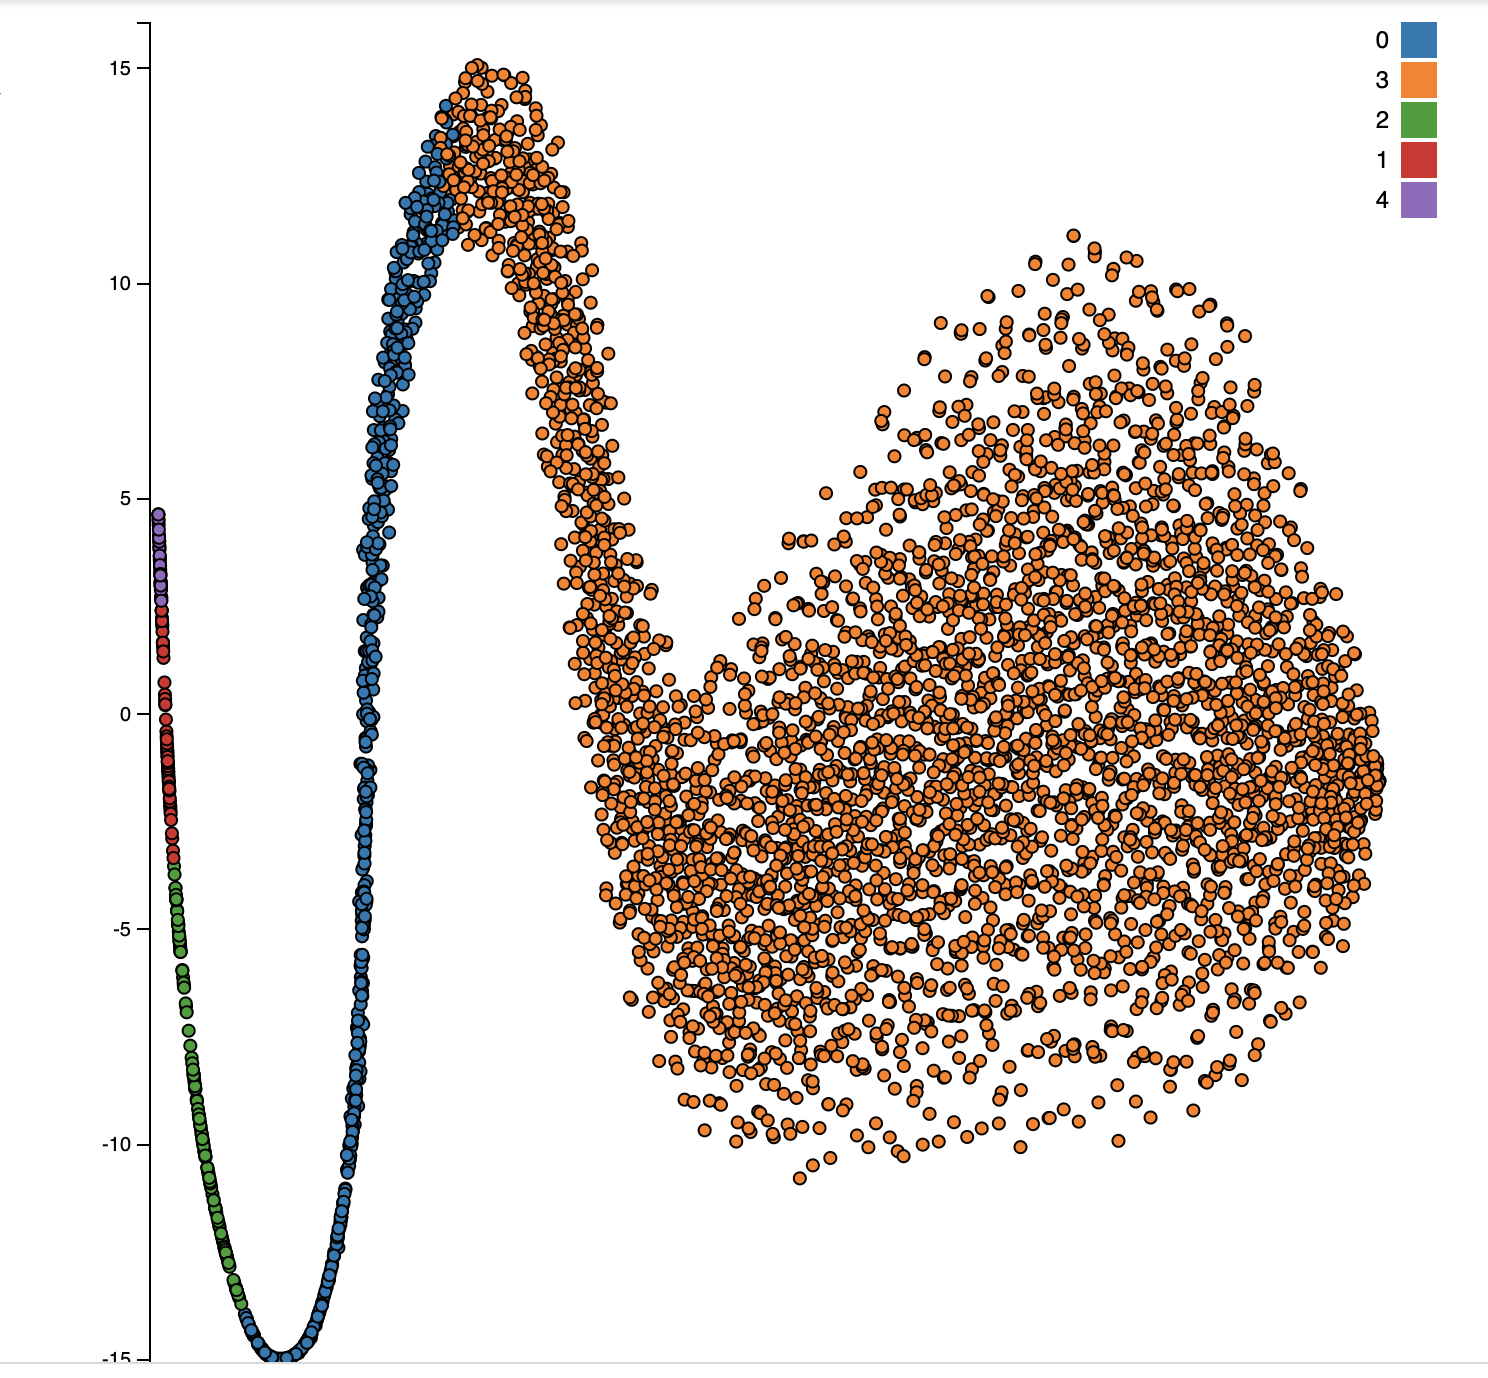

In [35]:
#This is an autograded cell, do not edit/delete
Image('trained_scatter.png')

### **Q7** Visualizing the PRE-TRAINED vectors (1.5 points)

In this question, you'll execute the same analysis as in Q6, but on PRE-TRAINED vectors.

#### **Q7a**

Load the google vector model

(It must be downloaded as `GoogleNews-vectors-negative300` for you if you ran the first code-chunk at the top of this notebook)


In [36]:
# google_model
google_model


Downsample the pre-trained google model to anywhere between 10,000 to 25,000 words.

In [37]:
#your code here
import random
down_google_model = random.sample(list(google_model.key_to_index.keys()), random.randint(10000, 25000))

Create a list of the unique set of words from this downsampled model

In [38]:
#your code here
unique_google_model = list(set(down_google_model))


Extract respective vectors corresponding to the words in the down-sampled, pre-trained model

In [39]:
#your code here
vector = [google_model[word] for word in unique_google_model]


#### **Q7b**

Run Kmeans clustering on the pre-trained word vectors. Make sure to use the word vectors from the pre-trained model.

In [40]:
#your code here
from sklearn.cluster import KMeans


kmeans_google = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_google.fit(vector)
kmeans_google.labels_

array([3, 3, 3, ..., 3, 0, 3], dtype=int32)

#### **Q7c**
Reduce the dimensionality of the word vectors from the pre-trained model using tSNE

In [41]:
#your code here
data_embed2 = TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(np.array(vector))


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 23469 samples in 0.005s...
[t-SNE] Computed neighbors for 23469 samples in 16.403s...
[t-SNE] Computed conditional probabilities for sample 1000 / 23469
[t-SNE] Computed conditional probabilities for sample 2000 / 23469
[t-SNE] Computed conditional probabilities for sample 3000 / 23469
[t-SNE] Computed conditional probabilities for sample 4000 / 23469
[t-SNE] Computed conditional probabilities for sample 5000 / 23469
[t-SNE] Computed conditional probabilities for sample 6000 / 23469
[t-SNE] Computed conditional probabilities for sample 7000 / 23469
[t-SNE] Computed conditional probabilities for sample 8000 / 23469
[t-SNE] Computed conditional probabilities for sample 9000 / 23469
[t-SNE] Computed conditional probabilities for sample 10000 / 23469
[t-SNE] Computed conditional probabilities for sample 11000 / 23469
[t-SNE] Computed conditional probabilities for sample 12000 / 23469
[t-SNE] Computed conditional probabilities for s

In [42]:
np.shape(data_embed2)

(23469, 2)

#### **Q7d**

#### Create a dataframe with the following columns using the pre-trained vectors and corpus:

| Column |Description|
| --- | --- |
| x | the first dimension of result from TSNE |
| y | the second dimension of result from TSNE |
| Feature 1 | the word corresponding to the vector |
| Feature 2 | the kmeans cluster label |

<br>

Below is a sample of what the dataframe could look like:

|x	|y|	Feature 1|	Feature 2|
| --- | --- | --- | --- |
|	7.154159	|9.251100|	lips	|8|
|	-53.254147|	-13.514915|	them|	9|
|	34.049191	|-13.402843|	topic|	0|
|	-32.515320|	28.699677|	sofa|	24|
|	13.006302	|-4.270626|	half-past|	21|

In [43]:
#your code here
google_df = pd.DataFrame(data_embed2[:,:2],columns=["x","y"])
google_df['Feature 1'] = unique_google_model
google_df['Feature 2'] = kmeans_google.labels_
google_df.head()

,x,y,Feature 1,Feature 2
0,-0.483836,31.455486,Ms._Bzdewka,3
1,-5.866807,-7.647013,Wadia_Ells,3
2,34.771484,-12.309089,Ezogabine,3
3,-21.928070,24.352282,Emmanuel_Merel,3
4,-10.339700,1.999665,Worker_Cooperatives,3


#### **Q7e: Visualization**

In this question, you are required to visualize and explore the reduced dataset **from the pretrained model** you created in Q7d using the [d3-scatterplot](https://github.com/CAHLR/d3-scatterplot) library.

Note: The first code-chunk at the top in this notebook clones the libary from github. Make sure that it has been executed before you proceed.

##### Save your dataset as a tsv file 'd3-scatterplot/google_mytext.tsv'

Example:

```
google_df.to_csv('d3-scatterplot/google_mytext.tsv', sep='\t', index=False)
```


Note 1: The TSV file needs to be stored in the `d3-scatterplot` folder so that the d3-scatterplot library can access it.

Note 2: Make sure to save the TSV file WITHOUT the row index i.e. use `index=False`.


In [44]:
#your code here
google_df.to_csv('d3-scatterplot/google_mytext.tsv', sep='\t', index=False)

##### Visualize the reduced vectors by running the following code


In [45]:
def show_port(port, data_file, width=600, height=800):
  display(Javascript("""
  (async ()=>{
    fm = document.createElement('iframe')
    fm.src = await google.colab.kernel.proxyPort(%d) + '/index.html?dataset=%s'
    fm.width = '90%%'
    fm.height = '%d'
    fm.frameBorder = 0
    document.body.append(fm)
  })();
  """ % (port, data_file, height)))

port = 8001
data_file = 'google_mytext.tsv'
height = 1400

get_ipython().system_raw('cd d3-scatterplot && python3 -m http.server %d &' % port)
show_port(port, data_file, height)

<IPython.core.display.Javascript object>

Color the points by their kmeans cluster. You can do this by choosing "Feature 2" as the variable in the "Color" drop-down in the visualization.

Please include a snapshot of your visualization in the notebook. Refer to the tutorial video, and/or follow the steps below:

1) Take a snapshot of the visualization and save it on your computer with the filename `google_trained_scatter.png`

2) Upload the `google_trained_scatter.png` by clicking on the 'Files' icon on the left sidebar and clicking on the upload icon (the one with an upward arrow on top left)

3) Run the code below to display the image

In [46]:
#This is an autograded cell, do not edit/delete
Image('google_trained_scatter.png')

Output hidden; open in https://colab.research.google.com to view.

### **Q8: Exploration** (0.5 points)

This is an open-ended question.

On the visualizations in Q6 & Q7, lasso-select a group of points with the left mouse button and look at summaries of the group on the right-side of the plot. (Refer to the tutorial video for a demo on the lasso selection). Also look at the words / features of the selected points.

Comment on at least 3 patterns / similarities you see in the selected words in the visualization for the pre-trained vectors and the vectors trained on your corpus. Are you able to find any group of points that are close to each other in the 2D space that also have semantic similarity?

1. I noticed that similar words are clustered together (in the same color).For example, "blood" and "dead" are really close to each other in the same cluster on the visualization for question 6.
2. There are points where they are in the same cluster that also have semantic similarity, such as "Laura" and "Dr. Hesselius" who are humans are in the same cluster whereas "Carmila" (a vampire) is in different cluster.
3. q6 and q7 visualizations are in completely different shape. q7 looks like an oval shape. I think this might be because google pre_trained vectors have more words and larger dimensions.